# Vectorisation TF-IDF avec CountVectorizer et classification avec MultinomialNB

In [1]:
import os
import pandas as pd

path = "data/text_classification/"

# dataset dict with emtpy attribute train
dataset = pd.DataFrame()

for file in os.listdir(path):
    if file.endswith(".csv"):
        new_data = pd.read_csv(path + file, sep=";")
        dataset = pd.concat([dataset, new_data], ignore_index=True)

dataset

,text,CORRECT,NOT_FRENCH,NOT_TRIP,UNKNOWN
0,Trouve-moi un itinÃ©raire pour aller de meroux...,1,0,0,0
1,Où puis-je changer des devises étrangères ?,0,0,1,0
2,mymtbh unab zbakod nelrqgdgp sznlrls noe coi...,0,0,0,1
3,Tom se preguntaba qué tan profundo era el río.,0,1,1,0
4,Trouve-moi le chemin pour rejoindre la rÃ©side...,1,0,0,0
...,...,...,...,...,...
1414526,My journey starts at the city of Marcilly Sur ...,0,1,1,0
1414527,Comment puis-je me rendre de vannes Ã l'aérop...,1,0,0,0
1414528,"How long will you remain in Tokyo? ""Until Frid...",0,1,1,0
1414529,Je dÃ©sire aller Ã la gare de Versailles depu...,1,0,0,0


In [2]:
labels = [label for label in dataset.columns if label not in ['text']]
id2label = {i:label for i, label in enumerate(labels)}
label2id = {v:k for k,v in id2label.items()}

print(labels)

['CORRECT', 'NOT_FRENCH', 'NOT_TRIP', 'UNKNOWN']


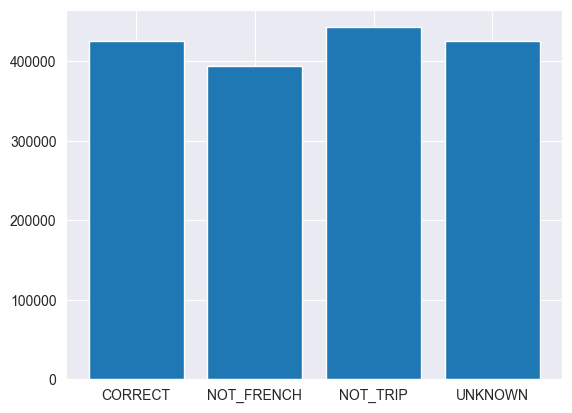

In [3]:
import matplotlib.pyplot as plt

plt.bar(labels, [sum(dataset[label]) for label in labels])
plt.show()

# Split du dataset en train, test et validation

In [4]:
from sklearn.model_selection import train_test_split

# Shuffle train dataset, and pick 50% of it
dataset = dataset.sample(frac=0.5, random_state=0)
X_train = dataset['text']
y_train = dataset[labels]

# To check how vectorizer works without UNKNOWN words being isolated
X_train_without_unknown = dataset[dataset['UNKNOWN'] == 0]['text']
y_train_without_unknown = dataset[dataset['UNKNOWN'] == 0][labels]

# Split test dataset into 10% validation and 10% test
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

print(X_train.shape, X_test.shape, X_val.shape)
print(y_train.shape, y_test.shape, y_val.shape)

(565812,) (70727,) (70727,)
(565812, 4) (70727, 4) (70727, 4)


In [5]:
X_train.values

array(['Pu_Ex"\'1`G`bd+eg]T?WPyX6qAUjL4D"W`&Y|CsJVZu|zkjc_b&l>OO@ISTLv{!O^F*AO`L"n~1GjM6IBli@#OiBqYCXffOH|9RI',
       '2;aa=1"K^r[xg3CS}5oC/-L{Y}UTA>wGBma\'?w-w0*PoUb5Exm8vcJ?"_80dE759_kW[IRyfiZh5z"uhtaoMm1jBN(bs@=m1#5L5',
       "Je veux partir de l'hopital de romilly-sur-seine.", ...,
       '4u""VJz;(kU=j]KjU86[[~^?CP`u*)CR>q~rwQmdP7\'^qV:y4,c"Q>R3c:n[(?O|>&HWdnzb6>@9czT--sf:Iw$qp;yhS !7ji}p',
       "He might be young but he's trustworthy.",
       "Let's head towards la celle-saint-avant, that's where I want to be."],
      dtype=object)

# Exemple d'utilisation de TfidfVectorizer

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer()

X_train_cv = v.fit_transform(X_train.values)
X_train_cv

<565812x1325583 sparse matrix of type '<class 'numpy.float64'>'
	with 6426548 stored elements in Compressed Sparse Row format>

La plupart des features extraites sont des mots issus de la classe UNKNOWN générés aléatoirement mais qui apparaissent très peu de fois 

In [7]:
v.get_feature_names_out()[100000:100050]

array(['_0d1', '_0dklfq', '_0dm', '_0e', '_0e2', '_0e7', '_0e_', '_0edr',
       '_0ei', '_0ekesv2', '_0eo', '_0ewk8', '_0f', '_0f3te', '_0fc',
       '_0fdh', '_0fh', '_0fj', '_0g', '_0g9l9', '_0gc', '_0go',
       '_0gtrjrn', '_0h', '_0hooohqca', '_0hrj', '_0hvidrj', '_0i',
       '_0igfky', '_0igl', '_0ikm', '_0iyjy', '_0j', '_0jgar', '_0jhow5e',
       '_0jp6r', '_0jy', '_0k', '_0k66', '_0kaw', '_0kse', '_0lhc',
       '_0lo8', '_0lr_y', '_0m', '_0m_vn', '_0mnxuocp', '_0n', '_0n44nui',
       '_0n9q0_'], dtype=object)

In [8]:
# Number of identified features
v.get_feature_names_out().shape

(1325583,)

In [9]:
v = TfidfVectorizer()

X_train_without_unknown_cv = v.fit_transform(X_train_without_unknown.values)
X_train_without_unknown_cv

<494290x84459 sparse matrix of type '<class 'numpy.float64'>'
	with 5083901 stored elements in Compressed Sparse Row format>

In [10]:
# Number of identified features
v.get_feature_names_out().shape

(84459,)

In [11]:
v.get_feature_names_out()[30000:30050]

array(['friseur', 'friseurin', 'frisierte', 'frisquet', 'frissonnera',
       'frisst', 'fristlos', 'frisur', 'frita', 'fritas', 'frite',
       'frites', 'fritierte', 'frittata', 'fritte', 'frittella',
       'fritten', 'fritto', 'friture', 'frivolous', 'frocs', 'frog',
       'frogs', 'froh', 'frohes', 'frohmuhl', 'froid', 'froide',
       'froides', 'from', 'fromage', 'fromme', 'frommer', 'frommt',
       'front', 'frontal', 'fronte', 'frontera', 'fronteras', 'frontière',
       'frontières', 'fronts', 'fronça', 'fror', 'frosch', 'frost',
       'frostige', 'frostwind', 'froten', 'frotta'], dtype=object)

In [12]:
# Add threshold to observe only words that appear at least 100 times
v = TfidfVectorizer(min_df=100)

X_train_without_unknown_cv = v.fit_transform(X_train_without_unknown.values)
X_train_without_unknown_cv

<494290x1927 sparse matrix of type '<class 'numpy.float64'>'
	with 4773816 stored elements in Compressed Sparse Row format>

In [13]:
# Number of identified features
v.get_feature_names_out().shape

(1927,)

In [14]:
v.get_feature_names_out()[::50]

array(['11', 'allez', 'argenton', 'away', 'besoin', 'brieuc', 'casa',
       'chauffailles', 'conflent', 'dein', 'dog', 'else', 'far', 'fue',
       'granville', 'hendaye', 'io', 'lafayette', 'likely', 'lutzelbourg',
       'marseille', 'miramas', 'morteau', 'nere', 'oder', 'paris', 'pl',
       'problema', 'reignac', 'routiè', 'school', 'sncf', 'suoi',
       'thionville', 'travel', 'vallon', 'villiers', 'weren', 'yzeure'],
      dtype=object)

# Utilisation d'un pipeline SKLearn (vectorizer TfidfVectorizer + classifier MultinomialNB avec OneVsRestClassifier pour la classification multi-label)

In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', OneVsRestClassifier(MultinomialNB()))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', OneVsRestClassifier(estimator=MultinomialNB()))])

# Evaluation du modèle, métriques

In [16]:
from sklearn.metrics import classification_report

y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

     CORRECT       0.88      1.00      0.93     21483
  NOT_FRENCH       1.00      0.99      0.99     19515
    NOT_TRIP       1.00      0.79      0.88     21925
     UNKNOWN       1.00      0.99      0.99     21345

   micro avg       0.96      0.94      0.95     84268
   macro avg       0.97      0.94      0.95     84268
weighted avg       0.97      0.94      0.95     84268
 samples avg       0.94      0.93      0.93     84268


C:\Developpement\environments\nlp\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))

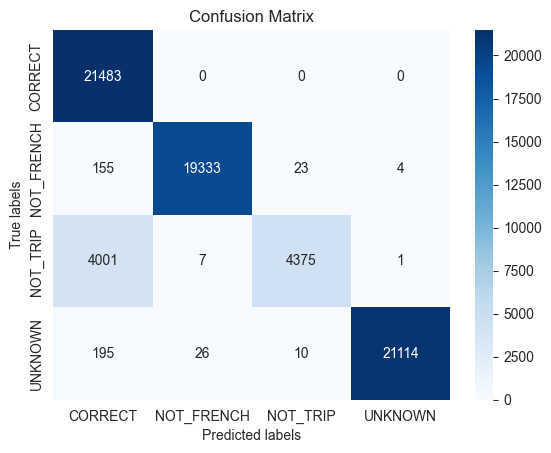

In [18]:
import seaborn as sns

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

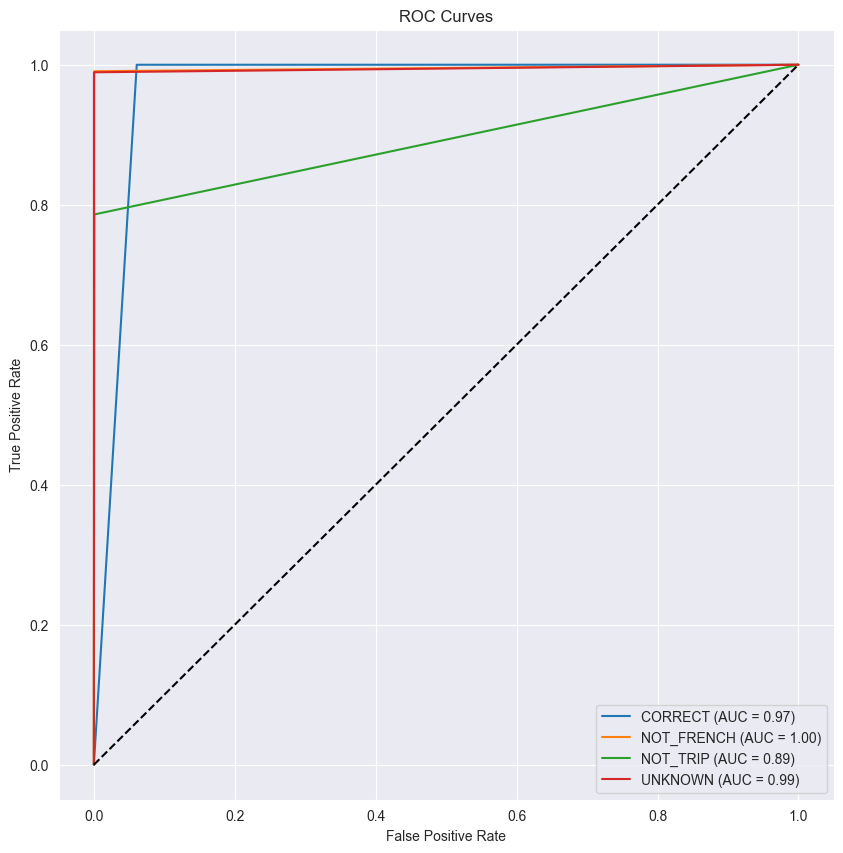

In [19]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(labels)):
    fpr[i], tpr[i], _ = roc_curve(y_test.values[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure(figsize=(10, 10))

for i in range(len(labels)):
    plt.plot(fpr[i], tpr[i], label=f"{labels[i]} (AUC = {roc_auc[i]:.2f})")
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

In [20]:
texts = [
    "Je veux aller au cinéma",
    "Je veux aller du cinéma au restaurant",
    "I'd like to go from the cinema to the restaurant",
    "I'd like to Paris from Nanterre",
    "zaeazea eaz e:az e,az e\"zahoiplù;!:gf",
    "J'aimerais me rendre de Nanterre à Paris",
    "Je veux aller de Le Havre à Port-Boulet",
    "Nantes à Toulouse",
    "Dirige moi vers Lyon depuis Saint-Étienne.",
    "Trouve moi un itinéraire pour aller chez Emma de Paris à Marseille",
]

predicted_labels = pipeline.predict(texts)
predicted_proba = pipeline.predict_proba(texts)

# Displaying the predicted labels and probability scores for new texts
for text, p_labels, prob in zip(texts, predicted_labels, predicted_proba):
    print("*", text)
    for i, score in enumerate(prob):
        print(' -', id2label[i], '=>', f"{round(score * 100, 1)}%")
    print()

* Je veux aller au cinéma
 - CORRECT => 2.8%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 66.4%
 - UNKNOWN => 0.1%

* Je veux aller du cinéma au restaurant
 - CORRECT => 1.0%
 - NOT_FRENCH => 0.1%
 - NOT_TRIP => 91.0%
 - UNKNOWN => 0.0%

* I'd like to go from the cinema to the restaurant
 - CORRECT => 0.0%
 - NOT_FRENCH => 100.0%
 - NOT_TRIP => 86.3%
 - UNKNOWN => 0.0%

* I'd like to Paris from Nanterre
 - CORRECT => 0.0%
 - NOT_FRENCH => 100.0%
 - NOT_TRIP => 9.7%
 - UNKNOWN => 0.0%

* zaeazea eaz e:az e,az e"zahoiplù;!:gf
 - CORRECT => 0.1%
 - NOT_FRENCH => 0.1%
 - NOT_TRIP => 0.1%
 - UNKNOWN => 99.7%

* J'aimerais me rendre de Nanterre à Paris
 - CORRECT => 88.8%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 5.1%
 - UNKNOWN => 0.0%

* Je veux aller de Le Havre à Port-Boulet
 - CORRECT => 74.4%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 10.4%
 - UNKNOWN => 0.0%

* Nantes à Toulouse
 - CORRECT => 55.9%
 - NOT_FRENCH => 11.6%
 - NOT_TRIP => 12.5%
 - UNKNOWN => 0.0%

* Dirige moi vers Lyon depuis Saint-Étienn

### Pour un même classifier, la vectorisation TF-IDF semble moins performante que la N-grams ou la BoW (voir matrice de confusion).